# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('YES.csv', show_col_types = FALSE)
df

# A tibble: 1,847 × 1
   GEOIDCORRECT;NAME_x;variable;estimate;Name;Location;Open Year-Round;Handica…¹
   <chr>                                                                        
 1 36061006900;Census Tract 69, New York County, New York;population;2450;James…
 2 36061006900;Census Tract 69, New York County, New York;poverty;2126;James J.…
 3 36061006900;Census Tract 69, New York County, New York;med_inc;237500;James …
 4 36061018300;Census Tract 183, New York County, New York;population;8578;Rive…
 5 36061018300;Census Tract 183, New York County, New York;poverty;8573;Riversi…
 6 36061018300;Census Tract 183, New York County, New York;med_inc;129909;River…
 7 36005030000;Census Tract 300, Bronx County, New York;population;6612;Colucci…
 8 36005030000;Census Tract 300, Bronx County, New York;poverty;6520;Colucci Pl…
 9 36005030000;Census Tract 300, Bronx County, New York;med_inc;72568;Colucci P…
10 36081083700;Census Tract 837, Queens County, New York;population;5531;Captai…
# ℹ 1,

In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


In [5]:
# Import data in python
#mtcars = pd.read_csv('mtcars.csv')
#mtcars.head()

# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




In [6]:
%%R
library(ggplot2)
library(readr)


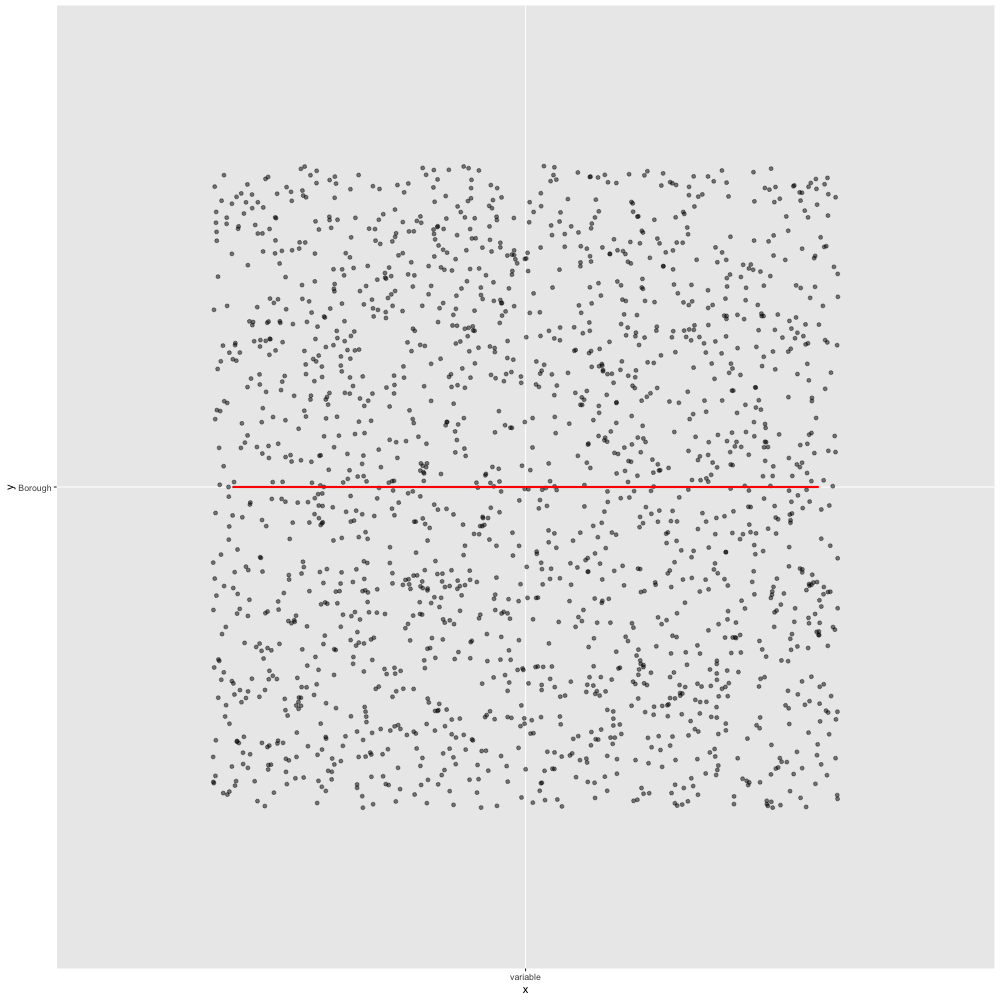

In [10]:
%%R -w 1000 -h 1000

ggplot(df) + 
    aes(x='variable', y='Borough') +
    geom_jitter(alpha=0.5) + 
    # overlay a box and whisker plot that is transparent with no outliers and is red
    geom_boxplot(fill=NA, outlier.shape=NA, color="red") 

In [15]:
%%R

toilets_df <- read_csv("YES.csv")


toilets_df$'Open Year-Round' <- as.factor(toilets_df$'Open Year-Round')


ggplot(toilets_df, aes(x=Borough, fill='Open Year-Round')) +
  geom_bar(position="dodge") +
  labs(title="Distribution of Toilets Open Year-Round by Borough",
       x="Borough",
       y="Count") +
  theme_minimal() +
  scale_fill_manual(values=c("Yes"="green", "No"="red"), name='Open Year-Round') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



Rows: 1847 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): GEOIDCORRECT;NAME_x;variable;estimate;Name;Location;Open Year-Round...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Error in `$<-`:
! Assigned data `as.factor(toilets_df$"Open Year-Round")` must be
  compatible with existing data.
✖ Existing data has 1847 rows.
✖ Assigned data has 0 rows.
ℹ Only vectors of size 1 are recycled.
Caused by error in `vectbl_recycle_rhs_rows()`:
! Can't recycle input of size 0 to size 1847.
Run `rlang::last_trace()` to see where the error occurred.
Warning messages:
1: One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 
2: Unknown or uninitialised column: `Open Year-Round`.
Error in `$<-`(`*tmp*`, "Open Year-Round", value = integer(0)) : 
✖ Existing data ha

RInterpreterError: Failed to parse and evaluate line '\ntoilets_df <- read_csv("YES.csv")\n\n\ntoilets_df$\'Open Year-Round\' <- as.factor(toilets_df$\'Open Year-Round\')\n\n\nggplot(toilets_df, aes(x=Borough, fill=\'Open Year-Round\')) +\n  geom_bar(position="dodge") +\n  labs(title="Distribution of Toilets Open Year-Round by Borough",\n       x="Borough",\n       y="Count") +\n  theme_minimal() +\n  scale_fill_manual(values=c("Yes"="green", "No"="red"), name=\'Open Year-Round\') +\n  theme(axis.text.x = element_text(angle = 45, hjust = 1))\n\n'.
R error message: 'Error in `$<-`(`*tmp*`, "Open Year-Round", value = integer(0)) : \n✖ Existing data has 1847 rows.\n✖ Assigned data has 0 rows.\nℹ Only vectors of size 1 are recycled.\nCaused by error in `vectbl_recycle_rhs_rows()`:\n! Can\'t recycle input of size 0 to size 1847.'
R stdout:
Warning messages:
1: One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 
2: Unknown or uninitialised column: `Open Year-Round`.

In [9]:
%%R
install.packages("ggplot2")
install.packages("ggmap")
install.packages("sf")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (RJ) [https]
 9: Brazil (SP 1) [https]
10: Brazil (SP 2) [https]
11: Bulgaria [https]
12: Canada (MB) [https]
13: Canada (ON) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Guangzhou) [https]
20: China (Jinan) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 2) [https]
24: China (Shenzhen) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Czech Republic [https]
28: Denmark [https]
29: Ecuador (Cuenca) [https]
30: France (Lyon 1) [https]
31: France (Lyon 2) [https]
32: France (Marseille) [https]
33: France (Paris 1) [https]
34: Germany (

Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
*** copying figures
** building package indices


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** installing vignettes
** testing if installed package can be loaded from temporary location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package can be loaded from final location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)
Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘plyr’ ...
** package ‘plyr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 14.0.0 (clang-1400.0.29.202)’
using C++ compiler: ‘Apple clang version 14.0.0 (clang-1400.0.29.202)’
using SDK: ‘MacOSX13.1.sdk’


clang++ -std=gnu++17 -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG  -I'/usr/local/lib/R/4.3/site-library/Rcpp/include' -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c RcppExports.cpp -o RcppExports.o
clang -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG  -I'/usr/local/lib/R/4.3/site-library/Rcpp/include' -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c loop_apply.c -o loop_apply.o
clang++ -std=gnu++17 -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG  -I'/usr/local/lib/R/4.3/site-library/Rcpp/include' -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c split-numeric.cpp -o split-numeric.o
clang++ -std=gnu++17 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -L/usr/local/Cellar/r/4.3.2/lib/R/l

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /usr/local/lib/R/4.3/site-library/00LOCK-plyr/00new/plyr/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package can be loaded from temporary location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (plyr)
Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘jpeg’ ...
** package ‘jpeg’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 14.0.0 (clang-1400.0.29.202)’
using SDK: ‘MacOSX13.1.sdk’


clang -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c read.c -o read.o
clang -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c reg.c -o reg.o
clang -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c write.c -o write.o
clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -L/usr/local/Cellar/r/4.3.2/lib/R/lib -L/usr/local/opt/gettext/lib -L/usr/local/opt/readline/lib -L/usr/local/opt/xz/lib -L/usr/local/lib -o jpeg.so read.o reg.o write.o -ljpeg -L/usr/local/Cellar/r/4.3.2/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /usr/local/lib/R/4.3/site-library/00LOCK-jpeg/00new/jpeg/libs
** R
** inst
** byte-compile and prepare package for lazy loading


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package can be loaded from temporary location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (jpeg)
Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘bitops’ ...
** package ‘bitops’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 14.0.0 (clang-1400.0.29.202)’
using SDK: ‘MacOSX13.1.sdk’


clang -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c bit-ops.c -o bit-ops.o
clang -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c cksum.c -o cksum.o
clang -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c init.c -o init.o
clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -L/usr/local/Cellar/r/4.3.2/lib/R/lib -L/usr/local/opt/gettext/lib -L/usr/local/opt/readline/lib -L/usr/local/opt/xz/lib -L/usr/local/lib -o bitops.so bit-ops.o cksum.o init.o -L/usr/local/Cellar/r/4.3.2/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /usr/local/lib/R/4.3/site-library/00LOCK-bitops/00new/bitops/libs
** R
** byte-compile and prepare package for lazy loading


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package can be loaded from temporary location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (bitops)
Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘ggmap’ ...
** package ‘ggmap’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package can be loaded from temporary location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package can be loaded from final location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (ggmap)
Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘sf’ ...
** package ‘sf’ successfully unpacked and MD5 sums checked
** using staged installation


configure: CC: clang
configure: CXX: clang++ -std=gnu++17
checking for gdal-config... /usr/local/bin/gdal-config
checking gdal-config usability... yes
configure: GDAL: 3.8.3
checking GDAL version >= 2.0.1... yes
checking for gcc... clang
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C... yes
checking whether clang accepts -g... yes
checking for clang option to enable C11 features... none needed
checking for stdio.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for strings.h... yes
checking for sys/stat.h... yes
checking for sys/types.h... yes
checking for unistd.h... yes
checking for gdal.h... yes
checking GDAL: linking with --libs only... yes
checking GDAL: /usr/local/Cellar/g

** libs
using C++ compiler: ‘Apple clang version 14.0.0 (clang-1400.0.29.202)’
using SDK: ‘MacOSX13.1.sdk’


clang++ -std=gnu++17 -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG -I/usr/local/Cellar/proj/9.3.1/include -I/usr/local/Cellar/libtiff/4.6.0/include -I/usr/local/opt/zstd/include -I/usr/local/Cellar/xz/5.4.5/include -I/usr/local/Cellar/jpeg-turbo/3.0.1/include -DHAVE_PROJ_H -I/usr/local/Cellar/gdal/3.8.3_1/include -I/usr/local/Cellar/geos/3.12.1/include -I'/usr/local/lib/R/4.3/site-library/Rcpp/include' -I/usr/local/opt/gettext/include -I/usr/local/opt/readline/include -I/usr/local/opt/xz/include -I/usr/local/include    -fPIC  -g -O2  -c RcppExports.cpp -o RcppExports.o
clang++ -std=gnu++17 -I"/usr/local/Cellar/r/4.3.2/lib/R/include" -DNDEBUG -I/usr/local/Cellar/proj/9.3.1/include -I/usr/local/Cellar/libtiff/4.6.0/include -I/usr/local/opt/zstd/include -I/usr/local/Cellar/xz/5.4.5/include -I/usr/local/Cellar/jpeg-turbo/3.0.1/include -DHAVE_PROJ_H -I/usr/local/Cellar/gdal/3.8.3_1/include -I/usr/local/Cellar/geos/3.12.1/include -I'/usr/local/lib/R/4.3/site-library/Rcpp/include' -I/u

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /usr/local/lib/R/4.3/site-library/00LOCK-sf/00new/sf/libs
** R
** demo
** inst
** byte-compile and prepare package for lazy loading


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
in method for ‘dbWriteTable’ with signature ‘"PostgreSQLConnection","character","sf"’: no definition for class “PostgreSQLConnection”
in method for ‘dbDataType’ with signature ‘"PostgreSQLConnection","sf"’: no definition for class “PostgreSQLConnection”
in method for ‘coerce’ with signature ‘"Spatial","sf"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"Spatial","sfc"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"sf","Spatial"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"sfc","Spatial"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"XY","Spatial"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"crs","CRS"’: no definition for class “CRS”
in method for ‘coerce’ with signature ‘"sgb

** help
*** installing help indices
*** copying figures
** building package indices


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** installing vignettes
** testing if installed package can be loaded from temporary location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location


Durante la inicialización - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (sf)


Installing package into ‘/usr/local/lib/R/4.3/site-library’
(as ‘lib’ is unspecified)
probando la URL 'https://stat.ethz.ch/CRAN/src/contrib/ggplot2_3.4.4.tar.gz'
Content type 'application/x-gzip' length 3159578 bytes (3.0 MB)
downloaded 3.0 MB


The downloaded source packages are in
	‘/private/var/folders/q8/p2jc4d5j7gq1vv276dfk9b480000gn/T/RtmpGLm8hR/downloaded_packages’
Installing package into ‘/usr/local/lib/R/4.3/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘plyr’, ‘jpeg’, ‘bitops’

probando la URL 'https://stat.ethz.ch/CRAN/src/contrib/plyr_1.8.9.tar.gz'
Content type 'application/x-gzip' length 401488 bytes (392 KB)
downloaded 392 KB

probando la URL 'https://stat.ethz.ch/CRAN/src/contrib/jpeg_0.1-10.tar.gz'
Content type 'application/x-gzip' length 18667 bytes (18 KB)
downloaded 18 KB

probando la URL 'https://stat.ethz.ch/CRAN/src/contrib/bitops_1.0-7.tar.gz'
Content type 'application/x-gzip' length 10809 bytes (10 KB)
downloaded 10 KB

probando la UR

In [12]:

%%R

library(ggplot2)
library(ggmap)
library(sf)

toilets_df <- read.csv("YES.csv")


map <- get_map(location = 'New York', zoom = 10)

ggmap(map) +
  geom_point(data = toilets_df, aes(x = Longitude, y = Latitude), color = "red", size = 3, alpha = 0.5) +
  labs(title = "Toilets in New York", x = "Longitude", y = "Latitude")

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.
Error in `get_googlemap()`:
! Google now requires an API key; see `ggmap::register_google()`.
Run `rlang::last_trace()` to see where the error occurred.
Linking to GEOS 3.12.1, GDAL 3.8.3, PROJ 9.3.1; sf_use_s2() is TRUE
Error in get_googlemap(center = location, zoom = zoom, maptype = maptype,  :


RInterpreterError: Failed to parse and evaluate line '\nlibrary(ggplot2)\nlibrary(ggmap)\nlibrary(sf)\n\ntoilets_df <- read.csv("YES.csv")\n\n\nmap <- get_map(location = \'New York\', zoom = 10)\n\nggmap(map) +\n  geom_point(data = toilets_df, aes(x = Longitude, y = Latitude), color = "red", size = 3, alpha = 0.5) +\n  labs(title = "Toilets in New York", x = "Longitude", y = "Latitude")\n'.
R error message: 'Error in get_googlemap(center = location, zoom = zoom, maptype = maptype,  :'
R stdout:
Linking to GEOS 3.12.1, GDAL 3.8.3, PROJ 9.3.1; sf_use_s2() is TRUE